<h1>Table of Contents<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"><li><span><a href="#Introduction-to-Pandas" data-toc-modified-id="Introduction-to-Pandas-1">Introduction to Pandas</a></span><ul class="toc-item"><li><span><a href="#Pandas-Data-Structures" data-toc-modified-id="Pandas-Data-Structures-1.1">Pandas Data Structures</a></span><ul class="toc-item"><li><span><a href="#Series" data-toc-modified-id="Series-1.1.1">Series</a></span></li><li><span><a href="#DataFrame" data-toc-modified-id="DataFrame-1.1.2">DataFrame</a></span></li><li><span><a href="#Exercise-1" data-toc-modified-id="Exercise-1-1.1.3">Exercise 1</a></span></li><li><span><a href="#Exercise-2" data-toc-modified-id="Exercise-2-1.1.4">Exercise 2</a></span></li></ul></li><li><span><a href="#Importing-data" data-toc-modified-id="Importing-data-1.2">Importing data</a></span><ul class="toc-item"><li><ul class="toc-item"><li><span><a href="#Missing-Values" data-toc-modified-id="Missing-Values-1.2.0.1">Missing Values</a></span></li><li><span><a href="#Microsoft-Excel" data-toc-modified-id="Microsoft-Excel-1.2.0.2">Microsoft Excel</a></span></li></ul></li></ul></li><li><span><a href="#Indexing-and-Selection" data-toc-modified-id="Indexing-and-Selection-1.3">Indexing and Selection</a></span><ul class="toc-item"><li><span><a href="#Exercise-3" data-toc-modified-id="Exercise-3-1.3.1">Exercise 3</a></span></li><li><span><a href="#Exercise-4" data-toc-modified-id="Exercise-4-1.3.2">Exercise 4</a></span></li></ul></li><li><span><a href="#Hierarchical-indexing" data-toc-modified-id="Hierarchical-indexing-1.4">Hierarchical indexing</a></span></li><li><span><a href="#Operations" data-toc-modified-id="Operations-1.5">Operations</a></span></li><li><span><a href="#Sorting" data-toc-modified-id="Sorting-1.6">Sorting</a></span><ul class="toc-item"><li><span><a href="#Exercise-5" data-toc-modified-id="Exercise-5-1.6.1">Exercise 5</a></span></li></ul></li><li><span><a href="#Missing-data" data-toc-modified-id="Missing-data-1.7">Missing data</a></span></li><li><span><a href="#Data-summarization" data-toc-modified-id="Data-summarization-1.8">Data summarization</a></span></li><li><span><a href="#Plotting" data-toc-modified-id="Plotting-1.9">Plotting</a></span></li><li><span><a href="#Writing-Data-to-Files" data-toc-modified-id="Writing-Data-to-Files-1.10">Writing Data to Files</a></span></li><li><span><a href="#References" data-toc-modified-id="References-1.11">References</a></span></li></ul></li></ul></div>

# Introduction to Pandas

**pandas** is a Python package providing fast, flexible, and expressive data structures designed to work with *relational* or *labeled* data both. It is a fundamental high-level building block for doing practical, real world data analysis in Python. 

pandas is well suited for:

- Tabular data with heterogeneously-typed columns, as in an SQL table or Excel spreadsheet
- Ordered and unordered (not necessarily fixed-frequency) time series data.
- Arbitrary matrix data (homogeneously typed or heterogeneous) with row and column labels
- Any other form of observational / statistical data sets. The data actually need not be labeled at all to be placed into a pandas data structure


Key features:
    
- Easy handling of **missing data**
- **Size mutability**: columns can be inserted and deleted from DataFrame and higher dimensional objects
- Automatic and explicit **data alignment**: objects can be explicitly aligned to a set of labels, or the data can be aligned automatically
- Powerful, flexible **group by functionality** to perform split-apply-combine operations on data sets
- Intelligent label-based **slicing, fancy indexing, and subsetting** of large data sets
- Intuitive **merging and joining** data sets
- Flexible **reshaping and pivoting** of data sets
- **Hierarchical labeling** of axes
- Robust **IO tools** for loading data from flat files, Excel files, databases, and HDF5
- **Time series functionality**: date range generation and frequency conversion, moving window statistics, moving window linear regressions, date shifting and lagging, etc.

In [1]:
import pandas as pd
import numpy as np
pd.options.mode.chained_assignment = None  # default='warn', Mutes warnings when copying a slice from a DataFrame.

## Pandas Data Structures

### Series

A **Series** is a single vector of data (like a NumPy 1-d array) with an *index* that labels each element in the vector.

In [2]:
counts = pd.Series([632, 1638, 569, 115])
counts

0     632
1    1638
2     569
3     115
dtype: int64

If an <b>index</b> is not specified, a default sequence of integers is assigned as the index. A NumPy array comprises the values of the `Series`, while the index is a pandas `Index` object.

In [3]:
counts.values

array([ 632, 1638,  569,  115])

In [4]:
counts.index

RangeIndex(start=0, stop=4, step=1)

We can assign meaningful labels to the index, if they are available:

In [5]:
bacteria = pd.Series([632, 1638, 569, 115], 
    index=['Firmicutes', 'Proteobacteria', 'Actinobacteria', 'Bacteroidetes'])

bacteria

Firmicutes         632
Proteobacteria    1638
Actinobacteria     569
Bacteroidetes      115
dtype: int64

These labels can be used to refer to the values in the `Series`.

In [6]:
bacteria['Actinobacteria'] #dictionary style

np.int64(569)

In [7]:
bacteria[[name.endswith('bacteria') for name in bacteria.index]]

Proteobacteria    1638
Actinobacteria     569
dtype: int64

In [8]:
[name.endswith('bacteria') for name in bacteria.index] #mask

[False, True, True, False]

Notice that the indexing operation preserved the association between the values and the corresponding indices.

We can still use <b>positional indexing</b> if we wish.

In [9]:
bacteria[0]

C:\Users\youri\AppData\Local\Temp\ipykernel_53164\3591401137.py:1: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  bacteria[0]


np.int64(632)

We can give both the array of values and the index <b>meaningful labels</b> themselves:

In [10]:
bacteria.name = 'counts'
bacteria.index.name = 'phylum'
bacteria

phylum
Firmicutes         632
Proteobacteria    1638
Actinobacteria     569
Bacteroidetes      115
Name: counts, dtype: int64

NumPy's math functions and other operations can be applied to Series without losing the data structure.

In [11]:
np.log(bacteria)

phylum
Firmicutes        6.448889
Proteobacteria    7.401231
Actinobacteria    6.343880
Bacteroidetes     4.744932
Name: counts, dtype: float64

In [12]:
bacteria.apply(np.log)

phylum
Firmicutes        6.448889
Proteobacteria    7.401231
Actinobacteria    6.343880
Bacteroidetes     4.744932
Name: counts, dtype: float64

We can also filter according to the values in the `Series`:

In [13]:
bacteria[bacteria>1000]

phylum
Proteobacteria    1638
Name: counts, dtype: int64

A `Series` can be thought of as an ordered key-value store. In fact, we can create one from a `dict`:

In [14]:
bacteria_dict = { 'Firmicutes': 632, 
                  'Proteobacteria': 1638, 
                  'Actinobacteria': 569,
                  'Bacteroidetes': 115 }
pd.Series(bacteria_dict)

Firmicutes         632
Proteobacteria    1638
Actinobacteria     569
Bacteroidetes      115
dtype: int64

Notice that the `Series` is created in key-sorted order.

If we pass a custom index to `Series`, it will select the corresponding values from the dict, and treat indices without corrsponding values as missing. Pandas uses the `NaN` (not a number) type for missing values.

In [15]:
bacteria2 = pd.Series(bacteria_dict, 
                      index=['Cyanobacteria','Firmicutes',
                             'Proteobacteria','Actinobacteria'])
bacteria2

Cyanobacteria        NaN
Firmicutes         632.0
Proteobacteria    1638.0
Actinobacteria     569.0
dtype: float64

In [16]:
bacteria2.isnull()

Cyanobacteria      True
Firmicutes        False
Proteobacteria    False
Actinobacteria    False
dtype: bool

Critically, the labels are used to **align data** when used in operations with other Series objects:

In [17]:
bacteria + bacteria2

Actinobacteria    1138.0
Bacteroidetes        NaN
Cyanobacteria        NaN
Firmicutes        1264.0
Proteobacteria    3276.0
dtype: float64

Contrast this with NumPy arrays, where arrays of the same length will combine values <b>element-wise</b>; adding Series combined values with the same label in the resulting series. Notice also that the missing values were propagated by addition.

### DataFrame

Inevitably, we want to be able to store, view and manipulate data that is *multivariate*, where for every index there are multiple fields or columns of data, often of varying data type.

A `DataFrame` is a tabular data structure, encapsulating multiple series like columns in a spreadsheet. Data are stored internally as a 2-dimensional object, but the `DataFrame` allows us to represent and manipulate higher-dimensional data.

In [18]:
data = pd.DataFrame({'value':[632, 1638, 569, 115, 433, 1130, 754, 555],
                     'patient':[1, 1, 1, 1, 2, 2, 2, 2],
                     'phylum':['Firmicutes', 'Proteobacteria', 'Actinobacteria', 
    'Bacteroidetes', 'Firmicutes', 'Proteobacteria', 'Actinobacteria', 'Bacteroidetes']})
data

,value,patient,phylum
0,632,1,Firmicutes
1,1638,1,Proteobacteria
2,569,1,Actinobacteria
3,115,1,Bacteroidetes
4,433,2,Firmicutes
5,1130,2,Proteobacteria
6,754,2,Actinobacteria
7,555,2,Bacteroidetes


Notice the `DataFrame` is sorted by column name. We can change the order by indexing them in the order we desire:

In [19]:
data[['phylum','value','patient']]

,phylum,value,patient
0,Firmicutes,632,1
1,Proteobacteria,1638,1
2,Actinobacteria,569,1
3,Bacteroidetes,115,1
4,Firmicutes,433,2
5,Proteobacteria,1130,2
6,Actinobacteria,754,2
7,Bacteroidetes,555,2


A `DataFrame` has a second index, representing the columns:

In [20]:
data.index

RangeIndex(start=0, stop=8, step=1)

The `dtypes` attribute reveals the data type for each column in our DataFrame. 

- `int64` is numeric integer values 
- `object` strings (letters and numbers)
- `float64` floating-point values

In [21]:
data.dtypes

value       int64
patient     int64
phylum     object
dtype: object

If we wish to access columns, we can do so either by dict-like indexing or by attribute:

In [22]:
data['patient']

0    1
1    1
2    1
3    1
4    2
5    2
6    2
7    2
Name: patient, dtype: int64

In [23]:
data.value

0     632
1    1638
2     569
3     115
4     433
5    1130
6     754
7     555
Name: value, dtype: int64

In [24]:
data[['value']]

,value
0,632
1,1638
2,569
3,115
4,433
5,1130
6,754
7,555


In [25]:
type(data[['value']])

pandas.core.frame.DataFrame

In [26]:
type(data.value)

pandas.core.series.Series

Notice this is different than with `Series`, where dict-like indexing retrieved a particular element (row). 

If we want access to a row in a `DataFrame`, we index its `loc` attribute.

In [27]:
data.loc[3]

value                115
patient                1
phylum     Bacteroidetes
Name: 3, dtype: object

### Exercise 1

Find the size of the first dimension of `data`.

In [28]:
data.shape[0]

8

An alternative way of initializing a `DataFrame` is with a list of dicts:

In [29]:
data = pd.DataFrame([{'patient': 1, 'phylum': 'Firmicutes', 'value': 632},
                    {'patient': 1, 'phylum': 'Proteobacteria', 'value': 1638},
                    {'patient': 1, 'phylum': 'Actinobacteria', 'value': 569},
                    {'patient': 1, 'phylum': 'Bacteroidetes', 'value': 115},
                    {'patient': 2, 'phylum': 'Firmicutes', 'value': 433},
                    {'patient': 2, 'phylum': 'Proteobacteria', 'value': 1130},
                    {'patient': 2, 'phylum': 'Actinobacteria', 'value': 754},
                    {'patient': 2, 'phylum': 'Bacteroidetes', 'value': 555}])
data

,patient,phylum,value
0,1,Firmicutes,632
1,1,Proteobacteria,1638
2,1,Actinobacteria,569
3,1,Bacteroidetes,115
4,2,Firmicutes,433
5,2,Proteobacteria,1130
6,2,Actinobacteria,754
7,2,Bacteroidetes,555


It's important to note that the `Series` returned when a `DataFrame` is indexed is merely a **view** on the `DataFrame`, and not a copy of the data itself. So you must be cautious when manipulating this data:

In [30]:
vals = data.value
vals

0     632
1    1638
2     569
3     115
4     433
5    1130
6     754
7     555
Name: value, dtype: int64

In [31]:
vals[5] = 0
data.value

0     632
1    1638
2     569
3     115
4     433
5       0
6     754
7     555
Name: value, dtype: int64

If we plan on modifying an extracted Series, its a good idea to make a copy.

In [32]:
vals = data.value.copy()
vals[5] = 1000
data.value

0     632
1    1638
2     569
3     115
4     433
5       0
6     754
7     555
Name: value, dtype: int64

We can create or modify columns by assignment:

In [33]:
data.value[[3,4,6]] = [14, 21, 5]
data

,patient,phylum,value
0,1,Firmicutes,632
1,1,Proteobacteria,1638
2,1,Actinobacteria,569
3,1,Bacteroidetes,14
4,2,Firmicutes,21
5,2,Proteobacteria,0
6,2,Actinobacteria,5
7,2,Bacteroidetes,555


In [34]:
data['year'] = 2013
data

,patient,phylum,value,year
0,1,Firmicutes,632,2013
1,1,Proteobacteria,1638,2013
2,1,Actinobacteria,569,2013
3,1,Bacteroidetes,14,2013
4,2,Firmicutes,21,2013
5,2,Proteobacteria,0,2013
6,2,Actinobacteria,5,2013
7,2,Bacteroidetes,555,2013


But note we cannot use the attribute indexing method to add a new column:

In [35]:
data.treatment = 1
data

,patient,phylum,value,year
0,1,Firmicutes,632,2013
1,1,Proteobacteria,1638,2013
2,1,Actinobacteria,569,2013
3,1,Bacteroidetes,14,2013
4,2,Firmicutes,21,2013
5,2,Proteobacteria,0,2013
6,2,Actinobacteria,5,2013
7,2,Bacteroidetes,555,2013


In [36]:
data.treatment

1

### Exercise 2

From the `data` table above, return all rows for which the phylum name ends in "bacteria" and the value is greater than 1000.

In [37]:
data[data['phylum'].apply(lambda x: x.endswith('bacteria')) & data['value'].apply(lambda x: x>1000)]

,patient,phylum,value,year
1,1,Proteobacteria,1638,2013


Specifying a `Series` as a new column causes its values to be added according to the `DataFrame`'s index:

In [38]:
treatment = pd.Series([0]*4 + [1]*2)
treatment

0    0
1    0
2    0
3    0
4    1
5    1
dtype: int64

In [39]:
data['treatment'] = treatment
data

,patient,phylum,value,year,treatment
0,1,Firmicutes,632,2013,0.0
1,1,Proteobacteria,1638,2013,0.0
2,1,Actinobacteria,569,2013,0.0
3,1,Bacteroidetes,14,2013,0.0
4,2,Firmicutes,21,2013,1.0
5,2,Proteobacteria,0,2013,1.0
6,2,Actinobacteria,5,2013,NaN
7,2,Bacteroidetes,555,2013,NaN


We can use the `drop` method to remove rows or columns, which by <b>default drops rows</b>. We can be explicit by using the `axis` argument:

In [40]:
data_nomonth = data.drop('treatment', axis=1)
data_nomonth

,patient,phylum,value,year
0,1,Firmicutes,632,2013
1,1,Proteobacteria,1638,2013
2,1,Actinobacteria,569,2013
3,1,Bacteroidetes,14,2013
4,2,Firmicutes,21,2013
5,2,Proteobacteria,0,2013
6,2,Actinobacteria,5,2013
7,2,Bacteroidetes,555,2013


In [41]:
data_nomonth.drop(0)

,patient,phylum,value,year
1,1,Proteobacteria,1638,2013
2,1,Actinobacteria,569,2013
3,1,Bacteroidetes,14,2013
4,2,Firmicutes,21,2013
5,2,Proteobacteria,0,2013
6,2,Actinobacteria,5,2013
7,2,Bacteroidetes,555,2013


The dtype is automatically chosen to be as general as needed to accommodate all the columns.

In [42]:
df = pd.DataFrame({'foo': [1,2,3], 'bar':[0.4, -1.0, 4.5]})
df.values

array([[ 1. ,  0.4],
       [ 2. , -1. ],
       [ 3. ,  4.5]])

In [43]:
df.values.dtype

dtype('float64')

`Index` objects are **immutable**:

In [44]:
#data.index[0] = 15 #that doesn't work

This is so that `Index` objects can be shared between data structures without fear that they will be changed.

In [45]:
bacteria2.index = bacteria.index

In [46]:
bacteria2

phylum
Firmicutes           NaN
Proteobacteria     632.0
Actinobacteria    1638.0
Bacteroidetes      569.0
dtype: float64

## Importing data

A key, but often under-appreciated, step in data analysis is importing the data that we wish to analyze. Though it is easy to load basic data structures into Python using built-in tools or those provided by packages like NumPy, it is non-trivial to import structured data well, and to easily convert this input into a robust data structure:

    genes = np.loadtxt("genes.csv", delimiter=",", dtype=[('gene', '|S10'), ('value', '<f4')])

Pandas provides a convenient set of functions for importing tabular data from a number of formats directly into a `DataFrame` object. These functions include a slew of options to perform type inference, indexing, parsing, iterating and cleaning automatically as data are imported.

Let's start with some more bacteria data, stored in csv format.

In [47]:
!head Data/microbiome.csv

'head' n'est pas reconnu en tant que commande interne
ou externe, un programme ex�cutable ou un fichier de commandes.


This table can be read into a DataFrame using `read_csv`:

In [48]:
mb = pd.read_csv("Data/microbiome.csv", sep=',')
mb.head()

,Taxon,Patient,Group,Tissue,Stool
0,Firmicutes,1,0,136,4182
1,Firmicutes,2,1,1174,703
2,Firmicutes,3,0,408,3946
3,Firmicutes,4,1,831,8605
4,Firmicutes,5,0,693,50


Notice that `read_csv` automatically considered the first row in the file to be a header row.

We can override default behavior by customizing some the arguments, like `header`, `names` or `index_col`.

In [49]:
pd.read_csv("Data/microbiome.csv", header=None).head()

,0,1,2,3,4
0,Taxon,Patient,Group,Tissue,Stool
1,Firmicutes,1,0,136,4182
2,Firmicutes,2,1,1174,703
3,Firmicutes,3,0,408,3946
4,Firmicutes,4,1,831,8605


`read_csv` is just a convenience function for `read_table`, since csv is such a common format:

In [50]:
mb = pd.read_csv("Data/microbiome.csv", sep=',')

The `sep` argument can be customized as needed to accomodate arbitrary separators. For example, we can use a regular expression to define a variable amount of whitespace, which is unfortunately very common in some data formats: 
    
    sep='\s+'

For a more useful index, we can specify the first two columns, which together provide a unique index to the data.

In [51]:
mb = pd.read_csv("Data/microbiome.csv", index_col=['Patient','Taxon'])
mb.head()

,,Group,Tissue,Stool
Patient,Taxon,,,
1,Firmicutes,0,136,4182
2,Firmicutes,1,1174,703
3,Firmicutes,0,408,3946
4,Firmicutes,1,831,8605
5,Firmicutes,0,693,50


This is called a *hierarchical* index, which we will revisit later in the section.

If we have sections of data that we do not wish to import (for example, known bad data), we can populate the `skiprows` argument:

In [52]:
pd.read_csv("Data/microbiome.csv", skiprows=[3,4,6]).head()

,Taxon,Patient,Group,Tissue,Stool
0,Firmicutes,1,0,136,4182
1,Firmicutes,2,1,1174,703
2,Firmicutes,5,0,693,50
3,Firmicutes,7,0,173,33
4,Firmicutes,8,1,228,80


If we only want to import a small number of rows from, say, a very large data file we can use `nrows`:

In [53]:
pd.read_csv("Data/microbiome.csv", nrows=4)

,Taxon,Patient,Group,Tissue,Stool
0,Firmicutes,1,0,136,4182
1,Firmicutes,2,1,1174,703
2,Firmicutes,3,0,408,3946
3,Firmicutes,4,1,831,8605


#### Missing Values

Most real-world data is incomplete, with values missing due to incomplete observation, data entry or transcription error, or other reasons. Pandas will automatically recognize and parse common missing data indicators, including `NA` and `NULL`.

In [54]:
!head -n 10 Data/microbiome_missing.csv

'head' n'est pas reconnu en tant que commande interne
ou externe, un programme ex�cutable ou un fichier de commandes.


In [55]:
pd.read_csv("Data/microbiome_missing.csv").head(10)

,Taxon,Patient,Tissue,Stool
0,Firmicutes,1,632,305.0
1,Firmicutes,2,136,4182.0
2,Firmicutes,3,NaN,703.0
3,Firmicutes,4,408,3946.0
4,Firmicutes,5,831,8605.0
5,Firmicutes,6,693,50.0
6,Firmicutes,7,718,717.0
7,Firmicutes,8,173,33.0
8,Firmicutes,9,228,NaN
9,Firmicutes,10,162,3196.0


Above, Pandas recognized `NA` and an empty field as missing data.

In [56]:
pd.isnull(pd.read_csv("Data/microbiome_missing.csv")).head(10)

,Taxon,Patient,Tissue,Stool
0,False,False,False,False
1,False,False,False,False
2,False,False,True,False
3,False,False,False,False
4,False,False,False,False
5,False,False,False,False
6,False,False,False,False
7,False,False,False,False
8,False,False,False,True
9,False,False,False,False


Unfortunately, there will sometimes be inconsistencies in the conventions for missing data. In this example, there is a question mark "?" and a large negative number where there should have been a positive integer. We can specify additional symbols with the `na_values` argument:
   

In [57]:
pd.read_csv("Data/microbiome_missing.csv", na_values=['?', -99999]).head(10)

,Taxon,Patient,Tissue,Stool
0,Firmicutes,1,632.0,305.0
1,Firmicutes,2,136.0,4182.0
2,Firmicutes,3,NaN,703.0
3,Firmicutes,4,408.0,3946.0
4,Firmicutes,5,831.0,8605.0
5,Firmicutes,6,693.0,50.0
6,Firmicutes,7,718.0,717.0
7,Firmicutes,8,173.0,33.0
8,Firmicutes,9,228.0,NaN
9,Firmicutes,10,162.0,3196.0


These can be specified on a column-wise basis using an appropriate dict as the argument for `na_values`.

#### Microsoft Excel

Since so much financial and scientific data ends up in Excel spreadsheets (regrettably), Pandas' ability to directly import Excel spreadsheets is valuable. This support is contingent on having one or two dependencies (depending on what version of Excel file is being imported) installed: `xlrd` and `openpyxl` (these may be installed with either `pip` or `easy_install`).

The `read_excel` convenience function in pandas imports a specific sheet from an Excel file

In [58]:
mb = pd.read_excel('Data/microbiome_MID2.xls', sheet_name='Sheet 1', header=None)
mb.head()

,0,1
0,"Archaea ""Crenarchaeota"" Thermoprotei Acidiloba...",2
1,"Archaea ""Crenarchaeota"" Thermoprotei Acidiloba...",14
2,"Archaea ""Crenarchaeota"" Thermoprotei Desulfuro...",23
3,"Archaea ""Crenarchaeota"" Thermoprotei Desulfuro...",1
4,"Archaea ""Crenarchaeota"" Thermoprotei Desulfuro...",2


There are several other data formats that can be imported into Python and converted into `DataFrames`, with the help of buitl-in or third-party libraries. These include JSON, XML, HDF5, relational and non-relational databases, and various web APIs. These are beyond the scope of this tutorial, but are covered in [Python for Data Analysis](http://shop.oreilly.com/product/0636920023784.do).

## Indexing and Selection

This section introduces the new user to the key functionality of Pandas that is required to use the software effectively.

For some variety, we will leave our digestive tract bacteria behind and employ some baseball data.

In [59]:
baseball = pd.read_csv("Data/baseball.csv", index_col='id')
baseball.head()

,player,year,stint,team,lg,g,ab,r,h,X2b,...,rbi,sb,cs,bb,so,ibb,hbp,sh,sf,gidp
id,,,,,,,,,,,,,,,,,,,,,
88641,womacto01,2006,2,CHN,NL,19,50,6,14,1,...,2.0,1.0,1.0,4,4.0,0.0,0.0,3.0,0.0,0.0
88643,schilcu01,2006,1,BOS,AL,31,2,0,1,0,...,0.0,0.0,0.0,0,1.0,0.0,0.0,0.0,0.0,0.0
88645,myersmi01,2006,1,NYA,AL,62,0,0,0,0,...,0.0,0.0,0.0,0,0.0,0.0,0.0,0.0,0.0,0.0
88649,helliri01,2006,1,MIL,NL,20,3,0,0,0,...,0.0,0.0,0.0,0,2.0,0.0,0.0,0.0,0.0,0.0
88650,johnsra05,2006,1,NYA,AL,33,6,0,1,0,...,0.0,0.0,0.0,0,4.0,0.0,0.0,0.0,0.0,0.0


Notice that we specified the `id` column as the index, since it appears to be a unique identifier. We could try to create a unique index ourselves by combining `player` and `year`:

In [60]:
baseball.index.is_unique

True

In [61]:
player_id = baseball.player + baseball.year.astype(str)
baseball_newind = baseball.copy()
baseball_newind.index = player_id
baseball_newind.head()

,player,year,stint,team,lg,g,ab,r,h,X2b,...,rbi,sb,cs,bb,so,ibb,hbp,sh,sf,gidp
womacto012006,womacto01,2006,2,CHN,NL,19,50,6,14,1,...,2.0,1.0,1.0,4,4.0,0.0,0.0,3.0,0.0,0.0
schilcu012006,schilcu01,2006,1,BOS,AL,31,2,0,1,0,...,0.0,0.0,0.0,0,1.0,0.0,0.0,0.0,0.0,0.0
myersmi012006,myersmi01,2006,1,NYA,AL,62,0,0,0,0,...,0.0,0.0,0.0,0,0.0,0.0,0.0,0.0,0.0,0.0
helliri012006,helliri01,2006,1,MIL,NL,20,3,0,0,0,...,0.0,0.0,0.0,0,2.0,0.0,0.0,0.0,0.0,0.0
johnsra052006,johnsra05,2006,1,NYA,AL,33,6,0,1,0,...,0.0,0.0,0.0,0,4.0,0.0,0.0,0.0,0.0,0.0


This looks okay, but let's check:

In [62]:
baseball_newind.index.is_unique

False

So, indices need not be unique. Our choice is not unique because some players change teams within years.

The most important consequence of a non-unique index is that indexing by label will return multiple values for some labels:

In [63]:
baseball_newind.loc['wickmbo012007']

,player,year,stint,team,lg,g,ab,r,h,X2b,...,rbi,sb,cs,bb,so,ibb,hbp,sh,sf,gidp
wickmbo012007,wickmbo01,2007,2,ARI,NL,8,0,0,0,0,...,0.0,0.0,0.0,0,0.0,0.0,0.0,0.0,0.0,0.0
wickmbo012007,wickmbo01,2007,1,ATL,NL,47,0,0,0,0,...,0.0,0.0,0.0,0,0.0,0.0,0.0,0.0,0.0,0.0


We will learn more about indexing below.

We can create a truly unique index by combining `player`, `team` and `year`:

In [64]:
player_unique = baseball.player + baseball.team + baseball.year.astype(str)
baseball_newind = baseball.copy()
baseball_newind.index = player_unique
baseball_newind.head()

,player,year,stint,team,lg,g,ab,r,h,X2b,...,rbi,sb,cs,bb,so,ibb,hbp,sh,sf,gidp
womacto01CHN2006,womacto01,2006,2,CHN,NL,19,50,6,14,1,...,2.0,1.0,1.0,4,4.0,0.0,0.0,3.0,0.0,0.0
schilcu01BOS2006,schilcu01,2006,1,BOS,AL,31,2,0,1,0,...,0.0,0.0,0.0,0,1.0,0.0,0.0,0.0,0.0,0.0
myersmi01NYA2006,myersmi01,2006,1,NYA,AL,62,0,0,0,0,...,0.0,0.0,0.0,0,0.0,0.0,0.0,0.0,0.0,0.0
helliri01MIL2006,helliri01,2006,1,MIL,NL,20,3,0,0,0,...,0.0,0.0,0.0,0,2.0,0.0,0.0,0.0,0.0,0.0
johnsra05NYA2006,johnsra05,2006,1,NYA,AL,33,6,0,1,0,...,0.0,0.0,0.0,0,4.0,0.0,0.0,0.0,0.0,0.0


In [65]:
baseball_newind.index.is_unique

True

We can create meaningful indices more easily using a hierarchical index; for now, we will stick with the numeric `id` field as our index.

### Exercise 3
Build another unique index without using the same columns as `player_unique`.

In [66]:
player_unique = baseball.team + baseball.year.astype(str) + baseball.player
player_unique.is_unique

True


Indexing works analogously to indexing in NumPy arrays, except we can use the labels in the `Index` object to extract values in addition to arrays of integers.

In [67]:
# Numpy-style indexing
baseball_newind[:3]

,player,year,stint,team,lg,g,ab,r,h,X2b,...,rbi,sb,cs,bb,so,ibb,hbp,sh,sf,gidp
womacto01CHN2006,womacto01,2006,2,CHN,NL,19,50,6,14,1,...,2.0,1.0,1.0,4,4.0,0.0,0.0,3.0,0.0,0.0
schilcu01BOS2006,schilcu01,2006,1,BOS,AL,31,2,0,1,0,...,0.0,0.0,0.0,0,1.0,0.0,0.0,0.0,0.0,0.0
myersmi01NYA2006,myersmi01,2006,1,NYA,AL,62,0,0,0,0,...,0.0,0.0,0.0,0,0.0,0.0,0.0,0.0,0.0,0.0


We can also slice with data labels, since they have an intrinsic order within the Index:

In [68]:
baseball_newind['womacto01CHN2006':'gonzalu01ARI2006']

,player,year,stint,team,lg,g,ab,r,h,X2b,...,rbi,sb,cs,bb,so,ibb,hbp,sh,sf,gidp
womacto01CHN2006,womacto01,2006,2,CHN,NL,19,50,6,14,1,...,2.0,1.0,1.0,4,4.0,0.0,0.0,3.0,0.0,0.0
schilcu01BOS2006,schilcu01,2006,1,BOS,AL,31,2,0,1,0,...,0.0,0.0,0.0,0,1.0,0.0,0.0,0.0,0.0,0.0
myersmi01NYA2006,myersmi01,2006,1,NYA,AL,62,0,0,0,0,...,0.0,0.0,0.0,0,0.0,0.0,0.0,0.0,0.0,0.0
helliri01MIL2006,helliri01,2006,1,MIL,NL,20,3,0,0,0,...,0.0,0.0,0.0,0,2.0,0.0,0.0,0.0,0.0,0.0
johnsra05NYA2006,johnsra05,2006,1,NYA,AL,33,6,0,1,0,...,0.0,0.0,0.0,0,4.0,0.0,0.0,0.0,0.0,0.0
finlest01SFN2006,finlest01,2006,1,SFN,NL,139,426,66,105,21,...,40.0,7.0,0.0,46,55.0,2.0,2.0,3.0,4.0,6.0
gonzalu01ARI2006,gonzalu01,2006,1,ARI,NL,153,586,93,159,52,...,73.0,0.0,1.0,69,58.0,10.0,7.0,0.0,6.0,14.0


In [69]:
baseball_newind['womacto01CHN2006':'gonzalu01ARI2006'] = 5
baseball_newind.head(10)

,player,year,stint,team,lg,g,ab,r,h,X2b,...,rbi,sb,cs,bb,so,ibb,hbp,sh,sf,gidp
womacto01CHN2006,5,5,5,5,5,5,5,5,5,5,...,5.0,5.0,5.0,5,5.0,5.0,5.0,5.0,5.0,5.0
schilcu01BOS2006,5,5,5,5,5,5,5,5,5,5,...,5.0,5.0,5.0,5,5.0,5.0,5.0,5.0,5.0,5.0
myersmi01NYA2006,5,5,5,5,5,5,5,5,5,5,...,5.0,5.0,5.0,5,5.0,5.0,5.0,5.0,5.0,5.0
helliri01MIL2006,5,5,5,5,5,5,5,5,5,5,...,5.0,5.0,5.0,5,5.0,5.0,5.0,5.0,5.0,5.0
johnsra05NYA2006,5,5,5,5,5,5,5,5,5,5,...,5.0,5.0,5.0,5,5.0,5.0,5.0,5.0,5.0,5.0
finlest01SFN2006,5,5,5,5,5,5,5,5,5,5,...,5.0,5.0,5.0,5,5.0,5.0,5.0,5.0,5.0,5.0
gonzalu01ARI2006,5,5,5,5,5,5,5,5,5,5,...,5.0,5.0,5.0,5,5.0,5.0,5.0,5.0,5.0,5.0
seleaa01LAN2006,seleaa01,2006,1,LAN,NL,28,26,2,5,1,...,0.0,0.0,0.0,1,7.0,0.0,0.0,6.0,0.0,1.0
francju01ATL2007,francju01,2007,2,ATL,NL,15,40,1,10,3,...,8.0,0.0,0.0,4,10.0,1.0,0.0,0.0,1.0,1.0
francju01NYN2007,francju01,2007,1,NYN,NL,40,50,7,10,0,...,8.0,2.0,1.0,10,13.0,0.0,0.0,0.0,1.0,1.0


For a more concise (and readable) syntax, we can use the new `query` method to perform selection on a `DataFrame`. Instead of having to type the fully-specified column, we can simply pass a string that describes what to select. The query above is then simply:

In [70]:
baseball_newind.query('ab > 500')

,player,year,stint,team,lg,g,ab,r,h,X2b,...,rbi,sb,cs,bb,so,ibb,hbp,sh,sf,gidp
vizquom01SFN2007,vizquom01,2007,1,SFN,NL,145,513,54,126,18,...,51.0,14.0,6.0,44,48.0,6.0,1.0,14.0,3.0,14.0
thomafr04TOR2007,thomafr04,2007,1,TOR,AL,155,531,63,147,30,...,95.0,0.0,0.0,81,94.0,3.0,7.0,0.0,5.0,14.0
rodriiv01DET2007,rodriiv01,2007,1,DET,AL,129,502,50,141,31,...,63.0,2.0,2.0,9,96.0,1.0,1.0,1.0,2.0,16.0
griffke02CIN2007,griffke02,2007,1,CIN,NL,144,528,78,146,24,...,93.0,6.0,1.0,85,99.0,14.0,1.0,0.0,9.0,14.0
delgaca01NYN2007,delgaca01,2007,1,NYN,NL,139,538,71,139,30,...,87.0,4.0,0.0,52,118.0,8.0,11.0,0.0,6.0,12.0
biggicr01HOU2007,biggicr01,2007,1,HOU,NL,141,517,68,130,31,...,50.0,4.0,3.0,23,112.0,0.0,3.0,7.0,5.0,5.0


The `DataFrame.index` and `DataFrame.columns` are placed in the query namespace by default. If you want to refer to a variable in the current namespace, you can prefix the variable with `@`:

In [71]:
min_ab = 500

In [72]:
baseball_newind.query('ab > @min_ab')

,player,year,stint,team,lg,g,ab,r,h,X2b,...,rbi,sb,cs,bb,so,ibb,hbp,sh,sf,gidp
vizquom01SFN2007,vizquom01,2007,1,SFN,NL,145,513,54,126,18,...,51.0,14.0,6.0,44,48.0,6.0,1.0,14.0,3.0,14.0
thomafr04TOR2007,thomafr04,2007,1,TOR,AL,155,531,63,147,30,...,95.0,0.0,0.0,81,94.0,3.0,7.0,0.0,5.0,14.0
rodriiv01DET2007,rodriiv01,2007,1,DET,AL,129,502,50,141,31,...,63.0,2.0,2.0,9,96.0,1.0,1.0,1.0,2.0,16.0
griffke02CIN2007,griffke02,2007,1,CIN,NL,144,528,78,146,24,...,93.0,6.0,1.0,85,99.0,14.0,1.0,0.0,9.0,14.0
delgaca01NYN2007,delgaca01,2007,1,NYN,NL,139,538,71,139,30,...,87.0,4.0,0.0,52,118.0,8.0,11.0,0.0,6.0,12.0
biggicr01HOU2007,biggicr01,2007,1,HOU,NL,141,517,68,130,31,...,50.0,4.0,3.0,23,112.0,0.0,3.0,7.0,5.0,5.0


The indexing field `loc` allows us to select subsets of rows and columns in an intuitive way:

In [73]:
baseball_newind.loc['gonzalu01ARI2006', ['h','X2b', 'X3b', 'hr']]

h      5
X2b    5
X3b    5
hr     5
Name: gonzalu01ARI2006, dtype: object

In [74]:
baseball_newind.loc[:'myersmi01NYA2006', 'hr']

womacto01CHN2006    5
schilcu01BOS2006    5
myersmi01NYA2006    5
Name: hr, dtype: int64

In addition to using `loc` to select rows and columns by **label**, pandas also allows indexing by **position** using the `iloc` attribute.

So, we can query rows and columns by absolute position, rather than by name:

In [75]:
baseball_newind.iloc[:5, 5:8]

,g,ab,r
womacto01CHN2006,5,5,5
schilcu01BOS2006,5,5,5
myersmi01NYA2006,5,5,5
helliri01MIL2006,5,5,5
johnsra05NYA2006,5,5,5


### Exercise 4

You can use the `isin` method query a DataFrame based upon a list of values as follows: 

    data['phylum'].isin(['Firmicutes', 'Bacteroidetes'])

Use `isin` on `baseball`to find all players that played for the Los Angeles Dodgers (LAN) or the San Francisco Giants (SFN). How many records contain these values?

In [76]:
len(baseball[baseball.team.isin(['LAN', 'SFN'])])

15

## Hierarchical indexing

In the baseball example, it was necessary to combine 3 fields to obtain a unique index that was not simply an integer value. A more elegant way to have done this would be to create a hierarchical index from the three fields.

In [77]:
baseball_h = baseball.set_index(['year', 'team', 'player'])
baseball_h.head(10)

stint  lg    g   ab   r    h  X2b  X3b  hr   rbi   sb  \
year team player                                                             
2006 CHN  womacto01      2  NL   19   50   6   14    1    0   1   2.0  1.0   
     BOS  schilcu01      1  AL   31    2   0    1    0    0   0   0.0  0.0   
     NYA  myersmi01      1  AL   62    0   0    0    0    0   0   0.0  0.0   
     MIL  helliri01      1  NL   20    3   0    0    0    0   0   0.0  0.0   
     NYA  johnsra05      1  AL   33    6   0    1    0    0   0   0.0  0.0   
     SFN  finlest01      1  NL  139  426  66  105   21   12   6  40.0  7.0   
     ARI  gonzalu01      1  NL  153  586  93  159   52    2  15  73.0  0.0   
     LAN  seleaa01       1  NL   28   26   2    5    1    0   0   0.0  0.0   
2007 ATL  francju01      2  NL   15   40   1   10    3    0   0   8.0  0.0   
     NYN  francju01      1  NL   40   50   7   10    0    0   1   8.0  2.0   

                      cs  bb    so   ibb  hbp   sh   sf  gidp  
year team player                                               
2006 CHN  womacto01  1.0   4   4.0   0.0  0.0  3.0  0.0   0.0  
     BOS  schilcu01  0.0   0   1.0   0.0  0.0  0.0  0.0   0.0  
     NYA  myersmi01  0.0   0   0.0   0.0  0.0  0.0  0.0   0.0  
     MIL  helliri01  0.0   0   2.0   0.0  0.0  0.0  0.0   0.0  
     NYA  johnsra05  0.0   0   4.0   0.0  0.0  0.0  0.0   0.0  
     SFN  finlest01  0.0  46  55.0   2.0  2.0  3.0  4.0   6.0  
     ARI  gonzalu01  1.0  69  58.0  10.0  7.0  0.0  6.0  14.0  
     LAN  seleaa01   0.0   1   7.0   0.0  0.0  6.0  0.0   1.0  
2007 ATL  francju01  0.0   4  10.0   1.0  0.0  0.0  1.0   1.0  
     NYN  francju01  1.0  10  13.0   0.0  0.0  0.0  1.0   1.0

In [78]:
baseball_h.index.is_unique

True

Try using this hierarchical index to retrieve Julio Franco (`francju01`), who played for the Atlanta Braves (`ATL`) in 2007:

In [79]:
baseball_h.loc[(2007, 'ATL', 'francju01')]

stint       2
lg         NL
g          15
ab         40
r           1
h          10
X2b         3
X3b         0
hr          0
rbi       8.0
sb        0.0
cs        0.0
bb          4
so       10.0
ibb       1.0
hbp       0.0
sh        0.0
sf        1.0
gidp      1.0
Name: (2007, ATL, francju01), dtype: object

Recall earlier we imported some microbiome data using two index columns. This created a 2-level hierarchical index:

In [80]:
mb = pd.read_csv("Data/microbiome.csv", index_col=['Taxon','Patient'])

In [81]:
mb.head(10)

Group  Tissue  Stool
Taxon      Patient                      
Firmicutes 1            0     136   4182
           2            1    1174    703
           3            0     408   3946
           4            1     831   8605
           5            0     693     50
           6            1     718    717
           7            0     173     33
           8            1     228     80
           9            0     162   3196
           10           1     372     32

With a hierachical index, we can select subsets of the data based on a *partial* index:

In [82]:
mb.loc['Proteobacteria']

,Group,Tissue,Stool
Patient,,,
1,0,2469,1821
2,1,839,661
3,0,4414,18
4,1,12044,83
5,0,2310,12
6,1,3053,547
7,0,395,2174
8,1,2651,767
9,0,1195,76


Hierarchical indices can be created on either or **both axes**. Here is a trivial example:

In [83]:
frame = pd.DataFrame(np.arange(12).reshape(( 4, 3)), 
                  index =[['a', 'a', 'b', 'b'], [1, 2, 1, 2]], 
                  columns =[['Ohio', 'Ohio', 'Colorado'], ['Green', 'Red', 'Green']])

frame

Ohio     Colorado
    Green Red    Green
a 1     0   1        2
  2     3   4        5
b 1     6   7        8
  2     9  10       11

If you want to get fancy, both the row and column indices themselves can be given names:

In [84]:
frame.index.names = ['key1', 'key2']
frame.columns.names = ['state', 'color']
frame

state      Ohio     Colorado
color     Green Red    Green
key1 key2                   
a    1        0   1        2
     2        3   4        5
b    1        6   7        8
     2        9  10       11

Additionally, the order of the set of indices in a hierarchical `MultiIndex` can be changed by swapping them pairwise:

In [85]:
frame.columns = frame.columns.swaplevel('state', 'color')
frame

color     Green  Red    Green
state      Ohio Ohio Colorado
key1 key2                    
a    1        0    1        2
     2        3    4        5
b    1        6    7        8
     2        9   10       11

## Operations

`DataFrame` and `Series` objects allow for several operations to take place either on a single object, or between two or more objects.

For example, we can perform arithmetic on the elements of two objects, such as combining baseball statistics across years. First, let's (artificially) construct two Series, consisting of home runs hit in years 2006 and 2007, respectively:

In [86]:
hr2006 = baseball.loc[baseball.year==2006, 'hr']
hr2006.index = baseball.player[baseball.year==2006]

hr2007 = baseball.loc[baseball.year==2007, 'hr']
hr2007.index = baseball.player[baseball.year==2007]

In [87]:
hr2007.head(10)

player
francju01     0
francju01     1
zaungr01     10
witasja01     0
williwo02     1
wickmbo01     0
wickmbo01     0
whitero02     4
whiteri01     0
wellsda01     0
Name: hr, dtype: int64

Now, let's add them together, in hopes of getting 2-year home run totals:

In [88]:
hr_total = hr2006 + hr2007
hr_total.head(20)

player
alomasa02    NaN
aloumo01     NaN
ausmubr01    NaN
benitar01    NaN
benitar01    NaN
biggicr01    NaN
bondsba01    NaN
cirilje01    NaN
cirilje01    NaN
claytro01    NaN
claytro01    NaN
clemero02    NaN
coninje01    NaN
coninje01    NaN
cormirh01    NaN
delgaca01    NaN
easleda01    NaN
edmonji01    NaN
embreal01    NaN
finlest01    7.0
Name: hr, dtype: float64

Pandas' data alignment places `NaN` values for labels that do not overlap in the two Series. In fact, there are only 6 players that occur in both years.

In [89]:
hr_total[hr_total.notnull()]

player
finlest01     7.0
gonzalu01    30.0
johnsra05     0.0
myersmi01     0.0
schilcu01     0.0
seleaa01      0.0
Name: hr, dtype: float64

While we do want the operation to honor the data labels in this way, we probably do not want the missing values to be filled with `NaN`. We can use the `add` method to calculate player home run totals by using the `fill_value` argument to insert a zero for home runs where labels do not overlap:

In [90]:
hr2007.add(hr2006, fill_value=0).head(20)

player
alomasa02     0.0
aloumo01     13.0
ausmubr01     3.0
benitar01     0.0
benitar01     0.0
biggicr01    10.0
bondsba01    28.0
cirilje01     0.0
cirilje01     2.0
claytro01     0.0
claytro01     1.0
clemero02     0.0
coninje01     0.0
coninje01     6.0
cormirh01     0.0
delgaca01    24.0
easleda01    10.0
edmonji01    12.0
embreal01     0.0
finlest01     7.0
Name: hr, dtype: float64

Operations can also be **broadcast** between rows or columns.

For example, if we subtract the maximum number of home runs hit from the `hr` column, we get how many fewer than the maximum were hit by each player:

In [91]:
(baseball.hr - baseball.hr.max()).head(20)

id
88641   -34
88643   -35
88645   -35
88649   -35
88650   -35
88652   -29
88653   -20
88662   -35
89177   -35
89178   -34
89330   -25
89333   -35
89334   -34
89335   -35
89336   -35
89337   -31
89338   -35
89339   -35
89340   -35
89341   -35
Name: hr, dtype: int64

## Sorting

Pandas objects include methods for re-ordering data.

In [92]:
baseball_newind.sort_index().head()

,player,year,stint,team,lg,g,ab,r,h,X2b,...,rbi,sb,cs,bb,so,ibb,hbp,sh,sf,gidp
alomasa02NYN2007,alomasa02,2007,1,NYN,NL,8,22,1,3,1,...,0.0,0.0,0.0,0,3.0,0.0,0.0,0.0,0.0,0.0
aloumo01NYN2007,aloumo01,2007,1,NYN,NL,87,328,51,112,19,...,49.0,3.0,0.0,27,30.0,5.0,2.0,0.0,3.0,13.0
ausmubr01HOU2007,ausmubr01,2007,1,HOU,NL,117,349,38,82,16,...,25.0,6.0,1.0,37,74.0,3.0,6.0,4.0,1.0,11.0
benitar01FLO2007,benitar01,2007,2,FLO,NL,34,0,0,0,0,...,0.0,0.0,0.0,0,0.0,0.0,0.0,0.0,0.0,0.0
benitar01SFN2007,benitar01,2007,1,SFN,NL,19,0,0,0,0,...,0.0,0.0,0.0,0,0.0,0.0,0.0,0.0,0.0,0.0


In [93]:
baseball_newind.sort_index(ascending=False).head()

,player,year,stint,team,lg,g,ab,r,h,X2b,...,rbi,sb,cs,bb,so,ibb,hbp,sh,sf,gidp
zaungr01TOR2007,zaungr01,2007,1,TOR,AL,110,331,43,80,24,...,52.0,0.0,0.0,51,55.0,8.0,2.0,1.0,6.0,9.0
womacto01CHN2006,5,5,5,5,5,5,5,5,5,5,...,5.0,5.0,5.0,5,5.0,5.0,5.0,5.0,5.0,5.0
witasja01TBA2007,witasja01,2007,1,TBA,AL,3,0,0,0,0,...,0.0,0.0,0.0,0,0.0,0.0,0.0,0.0,0.0,0.0
williwo02HOU2007,williwo02,2007,1,HOU,NL,33,59,3,6,0,...,2.0,0.0,0.0,0,25.0,0.0,0.0,5.0,0.0,1.0
wickmbo01ATL2007,wickmbo01,2007,1,ATL,NL,47,0,0,0,0,...,0.0,0.0,0.0,0,0.0,0.0,0.0,0.0,0.0,0.0


Try sorting the **columns** instead of the rows, in ascending order:

In [94]:
baseball_newind.sort_index(axis=1).head()

,X2b,X3b,ab,bb,cs,g,gidp,h,hbp,hr,...,player,r,rbi,sb,sf,sh,so,stint,team,year
womacto01CHN2006,5,5,5,5,5.0,5,5.0,5,5.0,5,...,5,5,5.0,5.0,5.0,5.0,5.0,5,5,5
schilcu01BOS2006,5,5,5,5,5.0,5,5.0,5,5.0,5,...,5,5,5.0,5.0,5.0,5.0,5.0,5,5,5
myersmi01NYA2006,5,5,5,5,5.0,5,5.0,5,5.0,5,...,5,5,5.0,5.0,5.0,5.0,5.0,5,5,5
helliri01MIL2006,5,5,5,5,5.0,5,5.0,5,5.0,5,...,5,5,5.0,5.0,5.0,5.0,5.0,5,5,5
johnsra05NYA2006,5,5,5,5,5.0,5,5.0,5,5.0,5,...,5,5,5.0,5.0,5.0,5.0,5.0,5,5,5


We can also use `sort_values` to sort a `Series` by value, rather than by label.

In [95]:
baseball.hr.sort_values(ascending=False).head(10)

id
89360    35
89462    30
89521    28
89361    26
89378    25
89489    24
89374    21
89371    21
89396    20
89439    20
Name: hr, dtype: int64

For a `DataFrame`, we can sort according to the values of one or more columns using the `by` argument of `sort_values`:

In [96]:
baseball[['player','sb','cs']].sort_values(ascending=[False,True], 
                                           by=['sb', 'cs']).head(10)

,player,sb,cs
id,,,
89378,sheffga01,22.0,5.0
89430,loftoke01,21.0,4.0
89347,vizquom01,14.0,6.0
89463,greensh01,11.0,1.0
88652,finlest01,7.0,0.0
89462,griffke02,6.0,1.0
89530,ausmubr01,6.0,1.0
89466,gonzalu01,6.0,2.0
89521,bondsba01,5.0,0.0


### Exercise 5

Calculate **on base percentage** for each player, and return the ordered series of estimates.

$$obp = \frac{h + bb + hbp}{ab + bb + hbp + sf}$$

In [97]:
baseball['obp']=baseball.apply(lambda p: (p.h+p.bb+p.hbp)/(p.ab+p.bb+p.hbp+p.sf) if (p.ab+p.bb+p.hbp+p.sf) != 0.0 else 0.0, axis=1)

## Missing data

The occurence of missing data is so prevalent that it pays to use tools like Pandas, which seamlessly integrates missing data handling so that it can be dealt with easily, and in the manner required by the analysis at hand.

Missing data are represented in `Series` and `DataFrame` objects by the `NaN` floating point value. However, `None` is also treated as missing, since it is commonly used as such in other contexts (*e.g.* NumPy).

In [98]:
foo = pd.Series([np.nan, -3, None, 'foobar'])
foo

0       NaN
1        -3
2      None
3    foobar
dtype: object

In [99]:
foo.isnull()

0     True
1    False
2     True
3    False
dtype: bool

Missing values may be dropped or indexed out:

In [100]:
foo.dropna()

1        -3
3    foobar
dtype: object

In [101]:
foo[foo.notnull()]

1        -3
3    foobar
dtype: object

By default, `dropna` drops entire rows in which one or more values are missing.

In [102]:
data.dropna()

,patient,phylum,value,year,treatment
0,1,Firmicutes,632,2013,0.0
1,1,Proteobacteria,1638,2013,0.0
2,1,Actinobacteria,569,2013,0.0
3,1,Bacteroidetes,14,2013,0.0
4,2,Firmicutes,21,2013,1.0
5,2,Proteobacteria,0,2013,1.0


This can be overridden by passing the `how='all'` argument, which only drops a row when every field is a missing value.

In [103]:
data.dropna(how='all')

,patient,phylum,value,year,treatment
0,1,Firmicutes,632,2013,0.0
1,1,Proteobacteria,1638,2013,0.0
2,1,Actinobacteria,569,2013,0.0
3,1,Bacteroidetes,14,2013,0.0
4,2,Firmicutes,21,2013,1.0
5,2,Proteobacteria,0,2013,1.0
6,2,Actinobacteria,5,2013,NaN
7,2,Bacteroidetes,555,2013,NaN


Rather than omitting missing data from an analysis, in some cases it may be suitable to fill the missing value in, either with a default value (such as zero) or a value that is either imputed or carried forward/backward from similar data points. We can do this programmatically in Pandas with the `fillna` argument.

In [104]:
bacteria2.fillna(0)

phylum
Firmicutes           0.0
Proteobacteria     632.0
Actinobacteria    1638.0
Bacteroidetes      569.0
dtype: float64

In [105]:
data.fillna({'year': 2013, 'treatment':2})

,patient,phylum,value,year,treatment
0,1,Firmicutes,632,2013,0.0
1,1,Proteobacteria,1638,2013,0.0
2,1,Actinobacteria,569,2013,0.0
3,1,Bacteroidetes,14,2013,0.0
4,2,Firmicutes,21,2013,1.0
5,2,Proteobacteria,0,2013,1.0
6,2,Actinobacteria,5,2013,2.0
7,2,Bacteroidetes,555,2013,2.0


Notice that `fillna` by default returns a new object with the desired filling behavior, rather than changing the `Series` or  `DataFrame` **in place**.

We can alter values in-place using `inplace=True`.

In [106]:
data['treatment'].fillna(2, inplace=True)
data

C:\Users\youri\AppData\Local\Temp\ipykernel_53164\1971607906.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  data['treatment'].fillna(2, inplace=True)


,patient,phylum,value,year,treatment
0,1,Firmicutes,632,2013,0.0
1,1,Proteobacteria,1638,2013,0.0
2,1,Actinobacteria,569,2013,0.0
3,1,Bacteroidetes,14,2013,0.0
4,2,Firmicutes,21,2013,1.0
5,2,Proteobacteria,0,2013,1.0
6,2,Actinobacteria,5,2013,2.0
7,2,Bacteroidetes,555,2013,2.0


Missing values can also be interpolated, using any one of a variety of methods:

In [107]:
bacteria2.fillna(method='bfill')

C:\Users\youri\AppData\Local\Temp\ipykernel_53164\370545093.py:1: FutureWarning: Series.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  bacteria2.fillna(method='bfill')


phylum
Firmicutes         632.0
Proteobacteria     632.0
Actinobacteria    1638.0
Bacteroidetes      569.0
dtype: float64

## Data summarization

We often wish to summarize data in `Series` or `DataFrame` objects, so that they can more easily be understood or compared with similar data. The NumPy package contains several functions that are useful here, but several summarization or reduction methods are built into Pandas data structures.

In [108]:
baseball.sum()

player    womacto01schilcu01myersmi01helliri01johnsra05f...
year                                                 200692
stint                                                   113
team      CHNBOSNYAMILNYASFNARILANATLNYNTORTBAHOUARIATLM...
lg        NLALALNLALNLNLNLNLNLALALNLNLNLALNLNLNLNLALALNL...
g                                                      5238
ab                                                    13654
r                                                      1869
h                                                      3582
X2b                                                     739
X3b                                                      55
hr                                                      437
rbi                                                  1847.0
sb                                                    138.0
cs                                                     46.0
bb                                                     1549
so                                      

Clearly, `sum` is more meaningful for some columns than others. For methods like `mean` for which application to string variables is not just meaningless, but impossible, these columns are <b>automatically exculded</b>:

In [109]:
baseball.mean(numeric_only=True)

year     2006.920000
stint       1.130000
g          52.380000
ab        136.540000
r          18.690000
h          35.820000
X2b         7.390000
X3b         0.550000
hr          4.370000
rbi        18.470000
sb          1.380000
cs          0.460000
bb         15.490000
so         24.080000
ibb         1.770000
hbp         1.120000
sh          1.380000
sf          1.200000
gidp        3.540000
obp         0.207518
dtype: float64

The important difference between NumPy's functions and Pandas' methods is that the latter have built-in support for handling missing data.

In [110]:
bacteria2

phylum
Firmicutes           NaN
Proteobacteria     632.0
Actinobacteria    1638.0
Bacteroidetes      569.0
dtype: float64

In [111]:
bacteria2.mean()

np.float64(946.3333333333334)

Sometimes we may not want to ignore missing values, and allow the `nan` to propagate.

In [112]:
bacteria2.mean(skipna=False)

np.float64(nan)

Passing `axis=1` will summarize over rows instead of columns, which only makes sense in certain situations.

In [113]:
extra_bases = baseball[['X2b','X3b','hr']].sum(axis=1)
extra_bases.sort_values(ascending=False).head(20)

id
88653    69
89439    57
89361    56
89462    55
89396    54
89360    54
89489    54
89371    50
89378    46
89374    46
89389    45
89523    44
89521    42
89463    41
89466    40
88652    39
89438    36
89330    35
89533    33
89481    29
dtype: int64

A useful summarization that gives a quick snapshot of multiple statistics for a `Series` or `DataFrame` is `describe`:

In [114]:
baseball.describe()

,year,stint,g,ab,r,h,X2b,X3b,hr,rbi,sb,cs,bb,so,ibb,hbp,sh,sf,gidp,obp
count,100.00000,100.000000,100.000000,100.000000,100.00000,100.000000,100.000000,100.000000,100.000000,100.00000,100.000000,100.000000,100.000000,100.000000,100.000000,100.00000,100.000000,100.000000,100.000000,100.000000
mean,2006.92000,1.130000,52.380000,136.540000,18.69000,35.820000,7.390000,0.550000,4.370000,18.47000,1.380000,0.460000,15.490000,24.080000,1.770000,1.12000,1.380000,1.200000,3.540000,0.207518
std,0.27266,0.337998,48.031299,181.936853,27.77496,50.221807,11.117277,1.445124,7.975537,28.34793,3.694878,1.067613,25.812649,32.804496,5.042957,2.23055,2.919042,2.035046,5.201826,0.159634
min,2006.00000,1.000000,1.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000
25%,2007.00000,1.000000,9.500000,2.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,1.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000
50%,2007.00000,1.000000,33.000000,40.500000,2.00000,8.000000,1.000000,0.000000,0.000000,2.00000,0.000000,0.000000,1.000000,7.000000,0.000000,0.00000,0.000000,0.000000,1.000000,0.255882
75%,2007.00000,1.000000,83.250000,243.750000,33.25000,62.750000,11.750000,1.000000,6.000000,27.00000,1.000000,0.000000,19.250000,37.250000,1.250000,1.00000,1.000000,2.000000,6.000000,0.334722
max,2007.00000,2.000000,155.000000,586.000000,107.00000,159.000000,52.000000,12.000000,35.000000,96.00000,22.000000,6.000000,132.000000,134.000000,43.000000,11.00000,14.000000,9.000000,21.000000,0.500000


`describe` can detect non-numeric data and sometimes yield useful information about it.

In [115]:
baseball.player.describe()

count           100
unique           82
top       wellsda01
freq              2
Name: player, dtype: object

We can also calculate summary statistics *across* multiple columns, for example, correlation and covariance.

$$cov(x,y) = \sum_i (x_i - \bar{x})(y_i - \bar{y})$$

In [116]:
baseball.hr.cov(baseball.X2b)

np.float64(69.07646464646454)

$$corr(x,y) = \frac{cov(x,y)}{(n-1)s_x s_y} = \frac{\sum_i (x_i - \bar{x})(y_i - \bar{y})}{\sqrt{\sum_i (x_i - \bar{x})^2 \sum_i (y_i - \bar{y})^2}}$$

In [117]:
baseball.hr.corr(baseball.X2b)

np.float64(0.7790615182539742)

In [118]:
baseball.ab.corr(baseball.h)

np.float64(0.9942174036272377)

## Plotting
Sometimes the correlation between two attributes is obvious when we plot them in the 2-d space. Also other kinds of plots (e.g., histograms) help us understand whether our data follows a particular law (e.g., a power law). Thus, it is crucial, not only to know how to select the appropriate slice of our dataset, but also how to properly visualize it. 

<Axes: xlabel='hr', ylabel='X2b'>

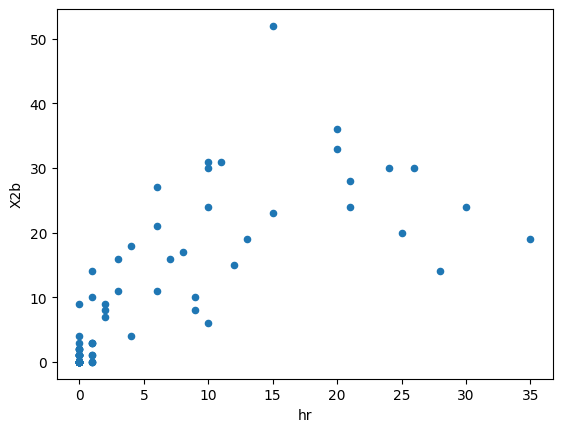

In [119]:
baseball.plot.scatter(x='hr', y='X2b')

<Axes: xlabel='ab', ylabel='h'>

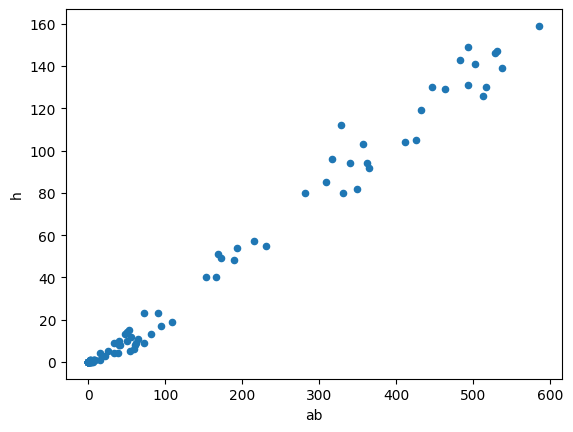

In [120]:
baseball.plot.scatter(x='ab', y='h')

Do you understand which of the above has better correlation?

<Axes: >

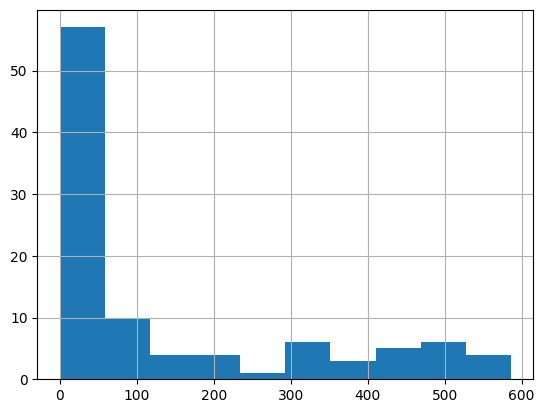

In [121]:
baseball['ab'].hist()

<Axes: >

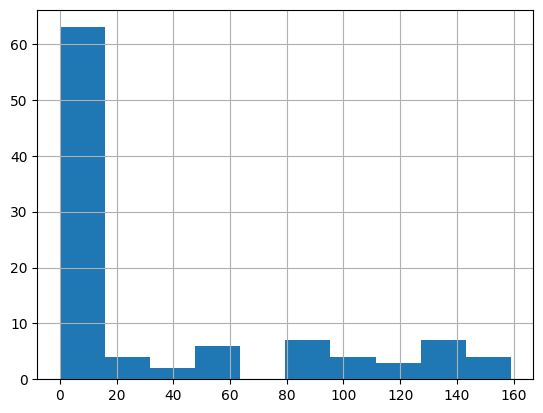

In [122]:
baseball['h'].hist()

What do you observe in the distributions of the two attributes? Is it safe to say that they correlate based on the last two plots? Why we need also the scatterplots?


## Writing Data to Files

As well as being able to read several data input formats, Pandas can also export data to a variety of storage formats. We will bring your attention to just a couple of these.

In [123]:
mb.to_csv("mb.csv")

The `to_csv` method writes a `DataFrame` to a comma-separated values (csv) file. You can specify custom delimiters (via `sep` argument), how missing values are written (via `na_rep` argument), whether the index is writen (via `index` argument), whether the header is included (via `header` argument), among other options.

An efficient way of storing data to disk is in **binary format**. Pandas supports this using Python’s built-in pickle serialization.

In [124]:
baseball.to_pickle("baseball_pickle")

The complement to `to_pickle` is the `read_pickle` function, which restores the pickle to a `DataFrame` or `Series`:

In [125]:
pd.read_pickle("baseball_pickle").head()

,player,year,stint,team,lg,g,ab,r,h,X2b,...,sb,cs,bb,so,ibb,hbp,sh,sf,gidp,obp
id,,,,,,,,,,,,,,,,,,,,,
88641,womacto01,2006,2,CHN,NL,19,50,6,14,1,...,1.0,1.0,4,4.0,0.0,0.0,3.0,0.0,0.0,0.333333
88643,schilcu01,2006,1,BOS,AL,31,2,0,1,0,...,0.0,0.0,0,1.0,0.0,0.0,0.0,0.0,0.0,0.500000
88645,myersmi01,2006,1,NYA,AL,62,0,0,0,0,...,0.0,0.0,0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000
88649,helliri01,2006,1,MIL,NL,20,3,0,0,0,...,0.0,0.0,0,2.0,0.0,0.0,0.0,0.0,0.0,0.000000
88650,johnsra05,2006,1,NYA,AL,33,6,0,1,0,...,0.0,0.0,0,4.0,0.0,0.0,0.0,0.0,0.0,0.166667


As Wes warns in his book [1], it is recommended that binary storage of data via pickle only be used as a temporary storage format, in situations where speed is relevant. This is because there is no guarantee that the pickle format will not change with future versions of Python.

## References

[1] [Python for Data Analysis](http://shop.oreilly.com/product/0636920023784.do) Wes McKinney